# 16234번 인구이동 - Gold 5

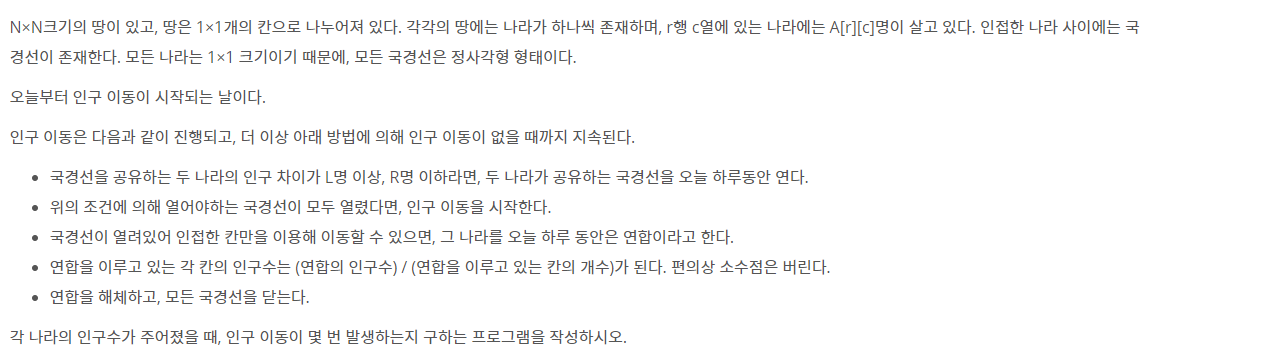
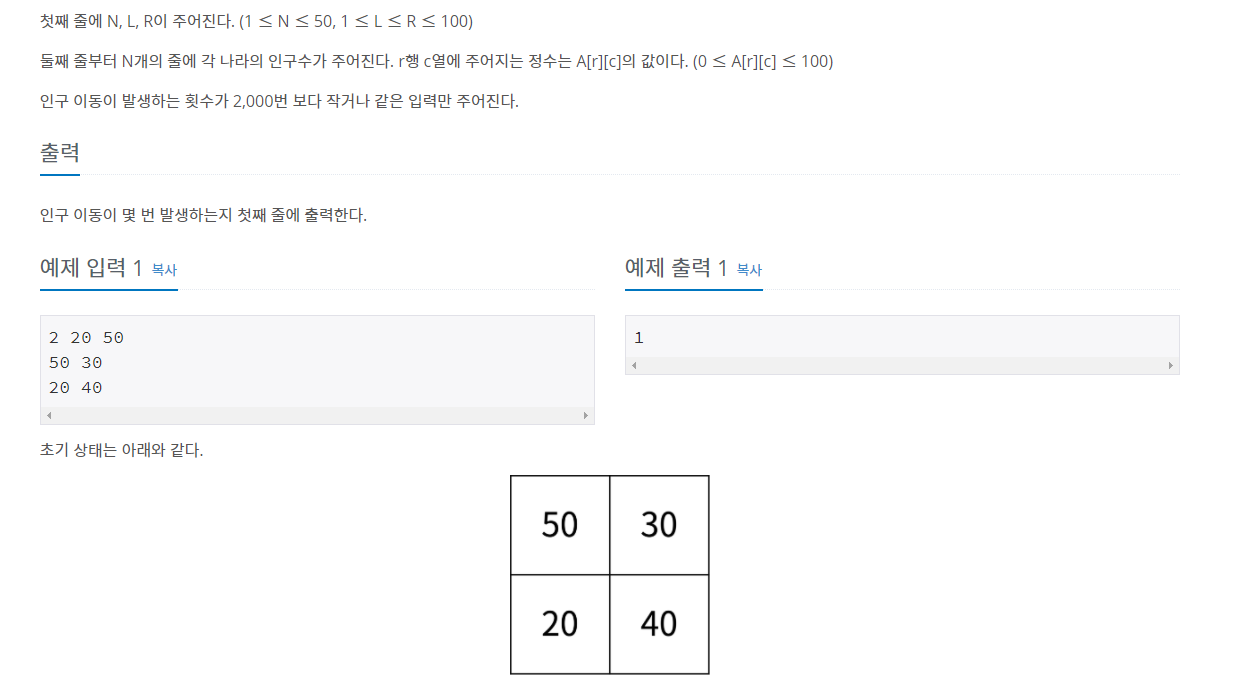
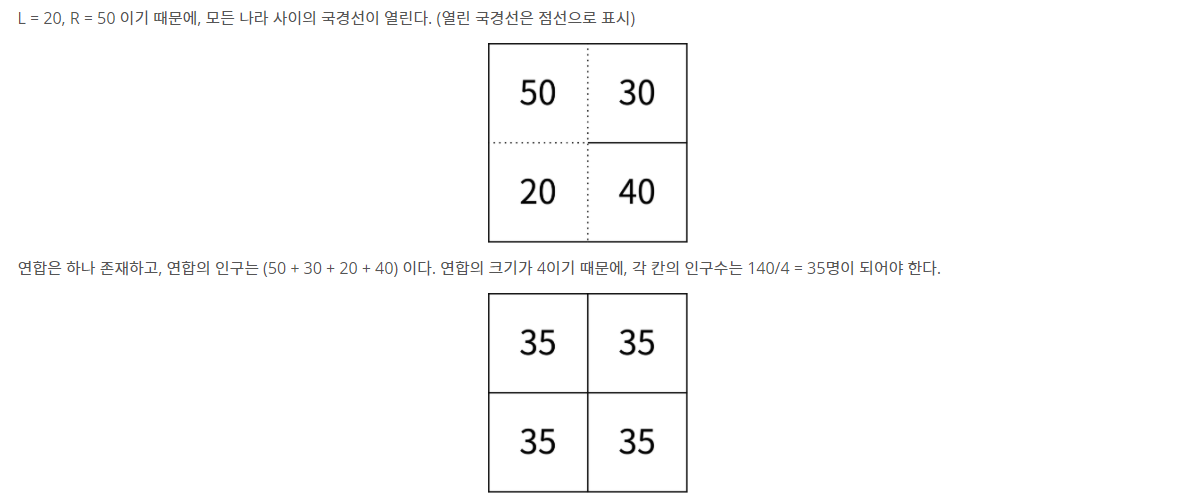

In [ ]:
n, l, r = map(int, input().split())
import copy
country = [list(map(int, input().split())) for _ in range(n)]
visit = [[0] * n for _ in range(n)]
from collections import deque

direction = [(1, 0), (-1, 0), (0, 1), (0, -1)]


def search():
    start_queue = deque()
    for y in range(n):
        for x in range(n):
            for dy, dx in [(1, 0), (0, 1)]:
                ny, nx = y + dy, x + dx
                if 0<=ny<n and 0<=nx<n:
                    diff = abs(country[y][x] - country[ny][nx])
                    if l <= diff <= r:
                        start_queue.append((ny, nx))
    return start_queue


def bfs(start):
    global country
    visit = [[0] * n for _ in range(n)]
    queue = deque([start])
    xy = deque([start])
    val = deque([country[start[0]][start[1]]])
    visit[start[0]][start[1]] = 1
    while queue:
        y, x = queue.popleft()

        for dy, dx in direction:
            ny, nx = y + dy, x + dx

            if 0 <= ny < n and 0 <= nx < n and visit[ny][nx] == 0 and l <= abs(country[y][x] - country[ny][nx]) <= r:
                visit[ny][nx] = 1
                xy.append((ny, nx))
                queue.append((ny, nx))
                val.append(country[ny][nx])

    avg = int(sum(val) / len(val))

    return xy,avg


start_queue = search()
days = 0
while start_queue:
    queue = start_queue
    xy = []
    avgs = []
    while queue:
        y, x = queue.popleft()
        used_queue, avg = bfs((y, x))
        xy.append(used_queue)
        avgs.append(avg)

        queue = deque(set(queue) - set(used_queue))

    for _, avg in zip(xy, avgs):
        for y, x in _:
            country[y][x] = avg
    days += 1
    start_queue = search()

print(days)